In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy as sp
import scipy.interpolate
import pickle 
import numpy as np

log_data = pd.read_csv('./spline_approx_loop.csv')
log_data.columns = ['l1', 'beta', 'T', 'x', 'a', 'func_value', 'time']
log_data['metric'] = log_data['x'] + log_data['l1'] * log_data['a'] * log_data['T'] /log_data['beta']
log_data['func_value'][log_data['func_value']<0] = 0
l1_grids, b_grids, t_grids, x_grids, a_grids, func_values = zip(*log_data[['l1', 'beta', 'T', 'x', 'a', 'func_value']].values)


In [14]:
spline = sp.interpolate.Rbf(l1_grids, a_grids,
                            b_grids, t_grids,
                            x_grids, func_values,
                            function='multiquadric')
with open('./SupPr_loop.pkl', 'wb') as file:
    pickle.dump(spline ,file)


SupPr_approxi = spline(l1_grids, a_grids, b_grids, t_grids, x_grids)


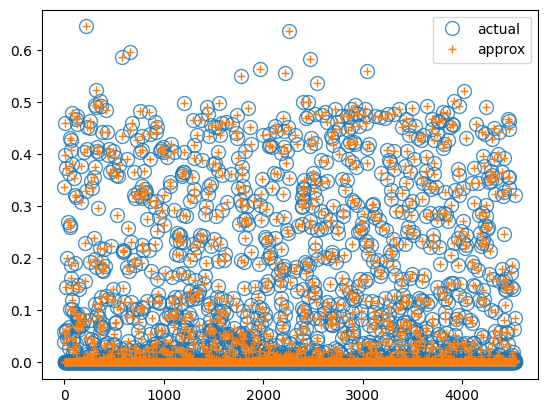

In [15]:
plt.plot(log_data['func_value'], 'o', label = 'actual', fillstyle='none', alpha=0.8, markersize=10)
plt.plot(SupPr_approxi, '+', label = 'approx')
plt.legend()